<a href="https://colab.research.google.com/github/devyulbae/AIClass/blob/main/Q1_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Score prediction


In [ ]:
# !pip install tensorflow-gpu

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.15.0'

In [ ]:
# In colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Setting Data
* 데이터를 불러와봅시다.

In [ ]:
xy = np.loadtxt("/content/drive/MyDrive/dataset/example_data/data-01-test-score.csv", #Set data path
                delimiter=',',
                dtype=np.float32)
print(xy)

x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

print(x_train, y_train)

print(x_train.shape, y_train.shape)


[[ 73.  80.  75. 152.]
 [ 93.  88.  93. 185.]
 [ 89.  91.  90. 180.]
 [ 96.  98. 100. 196.]
 [ 73.  66.  70. 142.]
 [ 53.  46.  55. 101.]
 [ 69.  74.  77. 149.]
 [ 47.  56.  60. 115.]
 [ 87.  79.  90. 175.]
 [ 79.  70.  88. 164.]
 [ 69.  70.  73. 141.]
 [ 70.  65.  74. 141.]
 [ 93.  95.  91. 184.]
 [ 79.  80.  73. 152.]
 [ 70.  73.  78. 148.]
 [ 93.  89.  96. 192.]
 [ 78.  75.  68. 147.]
 [ 81.  90.  93. 183.]
 [ 88.  92.  86. 177.]
 [ 78.  83.  77. 159.]
 [ 82.  86.  90. 177.]
 [ 86.  82.  89. 175.]
 [ 78.  83.  85. 175.]
 [ 76.  83.  71. 149.]
 [ 96.  93.  95. 192.]]
[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83

## make a dataset

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset = dataset.batch(batch_size=len(x_train)) # batch_size=8 int형으로 입력하시면 됩니다.


In [ ]:
next(iter(dataset))

(<tf.Tensor: shape=(25, 3), dtype=float32, numpy=
 array([[ 73.,  80.,  75.],
        [ 93.,  88.,  93.],
        [ 89.,  91.,  90.],
        [ 96.,  98., 100.],
        [ 73.,  66.,  70.],
        [ 53.,  46.,  55.],
        [ 69.,  74.,  77.],
        [ 47.,  56.,  60.],
        [ 87.,  79.,  90.],
        [ 79.,  70.,  88.],
        [ 69.,  70.,  73.],
        [ 70.,  65.,  74.],
        [ 93.,  95.,  91.],
        [ 79.,  80.,  73.],
        [ 70.,  73.,  78.],
        [ 93.,  89.,  96.],
        [ 78.,  75.,  68.],
        [ 81.,  90.,  93.],
        [ 88.,  92.,  86.],
        [ 78.,  83.,  77.],
        [ 82.,  86.,  90.],
        [ 86.,  82.,  89.],
        [ 78.,  83.,  85.],
        [ 76.,  83.,  71.],
        [ 96.,  93.,  95.]], dtype=float32)>,
 <tf.Tensor: shape=(25, 1), dtype=float32, numpy=
 array([[152.],
        [185.],
        [180.],
        [196.],
        [142.],
        [101.],
        [149.],
        [115.],
        [175.],
        [164.],
        [141.],
      

In [ ]:
for x, y in dataset:
  print(x, y)
  break

tf.Tensor(
[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]], shape=(25, 3), dtype=float32) tf.Tensor(
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]], shape=(25, 1), dtype=float32)


# 가설 설정

In [ ]:
W = tf.Variable(tf.random.normal([3, 1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias') # tf.keras.layers.Dense(1)

tf.print(W, b)


[[-1.33434498]
 [0.270893604]
 [-0.146937802]] [0.559196591]


In [ ]:
def linear_regression(features): # features => X 값이 들어올 예정
    hypothesis  = tf.matmul(features, W) + b
    return hypothesis

print(linear_regression(x_train))

tf.Tensor(
[[ -86.19683 ]
 [-113.361465]
 [-106.7706  ]
 [-115.68413 ]
 [ -89.25465 ]
 [ -65.78156 ]
 [ -82.77869 ]
 [ -55.801247]
 [-107.35262 ]
 [ -98.82203 ]
 [ -83.27451 ]
 [ -86.11027 ]
 [-111.17133 ]
 [ -93.909035]
 [ -84.530876]
 [-113.531395]
 [ -93.19446 ]
 [ -96.80754 ]
 [-104.5776  ]
 [ -92.349754]
 [ -98.784645]
 [-105.058655]
 [ -93.52526 ]
 [ -88.79944 ]
 [-116.30391 ]], shape=(25, 1), dtype=float32)


# cost 함수 설정


$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { ({ H(x_{ i }) }-y_{ i } })^{ 2 } }  $$

In [ ]:
def loss_fn(hypothesis, labels):
    cost = tf.reduce_mean(tf.square(hypothesis - labels))
    return cost

optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.00001)

# 학습

In [ ]:
epochs = 5000

for step in range(epochs):
  for features, labels in dataset:
    with tf.GradientTape() as tape:
      pred = linear_regression(features) # 모델의 예측값을 구합니다.
      loss_value = loss_fn(pred, labels)
    grads = tape.gradient(loss_value, [W, b])
    optimizer.apply_gradients(grads_and_vars=zip(grads,[W, b]))
    if step % 100 == 0:
          print("Iter: {}, Loss: {:.4f}".format(step, loss_value))

Iter: 0, Loss: 67666.7500
Iter: 100, Loss: 22.7668
Iter: 200, Loss: 21.6350
Iter: 300, Loss: 20.5860
Iter: 400, Loss: 19.6134
Iter: 500, Loss: 18.7112
Iter: 600, Loss: 17.8742
Iter: 700, Loss: 17.0973
Iter: 800, Loss: 16.3760
Iter: 900, Loss: 15.7060
Iter: 1000, Loss: 15.0835
Iter: 1100, Loss: 14.5049
Iter: 1200, Loss: 13.9668
Iter: 1300, Loss: 13.4663
Iter: 1400, Loss: 13.0007
Iter: 1500, Loss: 12.5671
Iter: 1600, Loss: 12.1634
Iter: 1700, Loss: 11.7874
Iter: 1800, Loss: 11.4369
Iter: 1900, Loss: 11.1101
Iter: 2000, Loss: 10.8054
Iter: 2100, Loss: 10.5211
Iter: 2200, Loss: 10.2557
Iter: 2300, Loss: 10.0079
Iter: 2400, Loss: 9.7765
Iter: 2500, Loss: 9.5603
Iter: 2600, Loss: 9.3581
Iter: 2700, Loss: 9.1691
Iter: 2800, Loss: 8.9923
Iter: 2900, Loss: 8.8268
Iter: 3000, Loss: 8.6719
Iter: 3100, Loss: 8.5268
Iter: 3200, Loss: 8.3909
Iter: 3300, Loss: 8.2635
Iter: 3400, Loss: 8.1441
Iter: 3500, Loss: 8.0321
Iter: 3600, Loss: 7.9270
Iter: 3700, Loss: 7.8285
Iter: 3800, Loss: 7.7359
Iter: 3900

In [ ]:
print(W, b)

<tf.Variable 'weight:0' shape=(3, 1) dtype=float32, numpy=
array([[0.17046045],
       [0.67848223],
       [1.155847  ]], dtype=float32)> <tf.Variable 'bias:0' shape=(1,) dtype=float32, numpy=array([0.56298333], dtype=float32)>


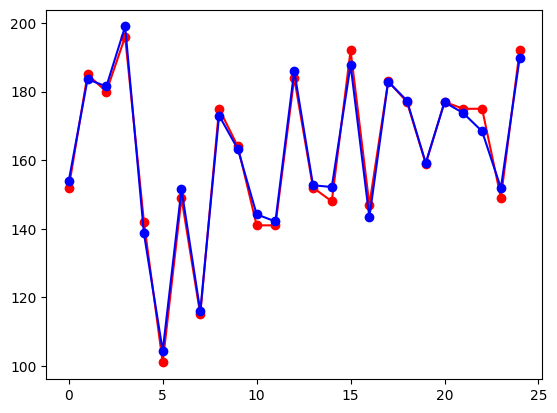

In [ ]:
hypothesis= linear_regression(x_train)

plt.plot(y_train, 'o-', color='red')
plt.plot(hypothesis.numpy(), 'o-', color='blue')
plt.show()